In [118]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize

In [119]:
txt= 'The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. \n\nThe Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. \n\nIn March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online. \n\nThe Vatican Secret Archives were separated from the library at the beginning of the 17th century; they contain another 150,000 items. \n\nScholars have traditionally divided the history of the library into five periods, Pre-Lateran, Lateran, Avignon, Pre-Vatican and Vatican. \n\nThe Pre-Lateran period, comprising the initial days of the library, dated from the earliest days of the Church. Only a handful of volumes survive from this period, though some are very significant.'
txt = txt.replace('\n', '').lower()
txt


'the vatican apostolic library (), more commonly called the vatican library or simply the vat, is the library of the holy see, located in vatican city. formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. it has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. the vatican library is a research library for history, law, philosophy, science and theology. the vatican library is open to anyone who can document their qualifications and research needs. photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. in march 2014, the vatican library began an initial four-year project of digitising its collection of manuscripts, to be made available online. the vatican secret archives were separated from the library at the beginning of the 17th cent

In [120]:
sent = sent_tokenize(txt)

# text preprocessing

lower_sent = [i.lower() for i in sent]
lower_sent

['the vatican apostolic library (), more commonly called the vatican library or simply the vat, is the library of the holy see, located in vatican city.',
 'formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts.',
 'it has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula.',
 'the vatican library is a research library for history, law, philosophy, science and theology.',
 'the vatican library is open to anyone who can document their qualifications and research needs.',
 'photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail.',
 'in march 2014, the vatican library began an initial four-year project of digitising its collection of manuscripts, to be made available online.',
 'the vatican secret archives were separated from the library at t

In [135]:
# Extract words from glove
word_embeddings= {}
f= open(r"D:\Datasets\glove.6B\glove.6B.200d.txt", encoding= 'utf-8')
count = 0

for lines in f:
    values= lines.split()
    words = values[0]
    coeffs = np.asarray(values[1:], dtype = 'float32')
    word_embeddings[words] = coeffs

f.close()


In [136]:
# We will first fetch vectors (each of size 100 elements) for the constituent words in a 
# sentence and then take mean/average of those vectors to arrive at a consolidated vector for 
# the sentence.

def glove(sent):
    sent_vector= []

    for i in sent:
        if(len(i)!=0):
            v= sum([word_embeddings.get(w, np.zeros(200,)) for w in i.split()])/(len(i.split())+0.001)

        else:
            v= np.zeros((200,))
        sent_vector.append(v)
        
    return sent_vector

In [137]:
sent_vector = glove(lower_sent)
sent_vector[0][:10]

array([ 0.17499845,  0.07886997,  0.1853344 , -0.18752506,  0.1071744 ,
       -0.03624745, -0.18594131, -0.02276974, -0.00104712, -0.18602703])

In [124]:
 len(sent_vector),len(sent_vector[0])

(11, 200)

In [125]:
from sklearn.metrics.pairwise import linear_kernel

def get_cos_sim(sent_vector):
    # compute cosine similarities
    cos_sim = linear_kernel(sent_vector, sent_vector)
    return cos_sim

In [126]:
cos_sim = get_cos_sim(sent_vector)

In [127]:
cos_sim[0]

array([11.51932272, 11.92644195,  8.48075914,  9.5172811 , 11.26024786,
       10.50369996,  9.99012807, 11.07140708,  8.58264813, 10.03464639,
       10.19444432])

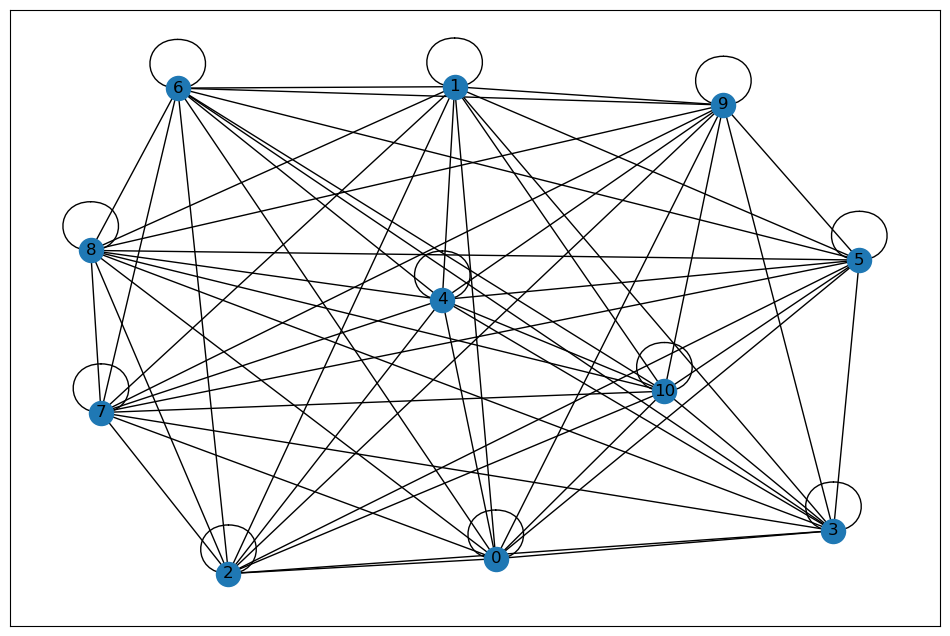

In [128]:
# convert sim_mat to graph, 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

nx_graph= nx.from_numpy_array(cos_sim)
scores= nx.pagerank(nx_graph)


plt.figure(figsize=(12,8))
nx.draw_networkx(nx_graph, with_labels=True)

In [129]:
scores[0]

0.09044012003260347

In [130]:
# text Summarization

#extract the top N sentences based on their rankings for summary generation.

ranked_sentences= sorted(((scores[i], s) for i, s in enumerate(lower_sent)), reverse= True)

In [131]:
ranked_sentences[:3]

[(0.10328210615478108,
  'formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts.'),
 (0.09797677212377982,
  'the vatican library is open to anyone who can document their qualifications and research needs.'),
 (0.09623031015274677,
  'photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail.')]

In [132]:
# Extract top 5 sentences as summaries

for i in range(5):
    print(ranked_sentences[i][1])

formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts.
the vatican library is open to anyone who can document their qualifications and research needs.
photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail.
only a handful of volumes survive from this period, though some are very significant.
the vatican secret archives were separated from the library at the beginning of the 17th century; they contain another 150,000 items.


###  --------------------------------------------Glove Method QA --------------------------------------------


In [199]:
# Process a user question
question = "what type of collections the library have?"

v= sum([word_embeddings.get(w, np.zeros(200,)) for w in question.split()])/(len(question.split())+0.001)
v= v.reshape(1, -1)

similarity_scores = cosine_similarity(sent_vector, v)

# Get the index of the most similar document
most_similar_index = similarity_scores.argmax()

# Extract the answer from the most similar document
answer = lower_sent[most_similar_index].split(":")

print("Question:", question)
print("Answer:", answer)

Question: what type of collections the library have?
Answer: ['formally established in 1475 although it is much older it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts.']


### -----------------------------------------------TF-IDF Method QA--------------------------------------------------

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# text preprocessing
txt = txt.replace('()', '').replace(',', '').replace(';', '').replace('-','').lower()

# sentence seperation 
sent = sent_tokenize(txt)

# Preprocess the corpus
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sent)

# Process a user question
question = "how many books the library have?"

# Vectorize the question
question_vector = vectorizer.transform([question])

# Retrieve relevant documents
similarity_scores = cosine_similarity(X, question_vector)

# Get the index of the most similar document
most_similar_index = similarity_scores.argmax()

# Extract the answer from the most similar document
answer = sent[most_similar_index].split(":")

print("Question:", question)
print("Answer:", answer)

Question: how many books the library have?
Answer: ['scholars have traditionally divided the history of the library into five periods prelateran lateran avignon prevatican and vatican.']


In [200]:
# similarity_scores

In [154]:
lower_sent[7].split(":")

['the vatican secret archives were separated from the library at the beginning of the 17th century; they contain another 150,000 items.']

In [174]:
txt = txt.replace('()', '').replace(',', '').replace(';', '').replace('-','').lower()
# txt = txt
# txt.replace

In [176]:
txt

'the vatican apostolic library  more commonly called the vatican library or simply the vat is the library of the holy see located in vatican city. formally established in 1475 although it is much older it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. it has 75000 codices from throughout history as well as 1.1 million printed books which include some 8500 incunabula. the vatican library is a research library for history law philosophy science and theology. the vatican library is open to anyone who can document their qualifications and research needs. photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. in march 2014 the vatican library began an initial fouryear project of digitising its collection of manuscripts to be made available online. the vatican secret archives were separated from the library at the beginning of the 17th century they contain 

In [170]:
sent

['the vatican apostolic library  more commonly called the vatican library or simply the vat is the library of the holy see located in vatican city.',
 'formally established in 1475 although it is much older it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts.',
 'it has 75000 codices from throughout history as well as 1.1 million printed books which include some 8500 incunabula.',
 'the vatican library is a research library for history law philosophy science and theology.',
 'the vatican library is open to anyone who can document their qualifications and research needs.',
 'photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail.',
 'in march 2014 the vatican library began an initial fouryear project of digitising its collection of manuscripts to be made available online.',
 'the vatican secret archives were separated from the library at the beginning of t